# Potato Disease Classification Using Deep Learning



#### Objective:
The goal of this project is to develop an automated system to accurately classify potato leaf diseases using image data. Potato plants are vulnerable to various diseases that affect crop quality and yield, with two of the most prevalent being Early Blight and Late Blight. Early identification of these diseases is critical for timely intervention, helping farmers reduce crop losses and optimize yields.

#### Problem Description:
In many regions, manual inspection is the primary method for disease detection, which is both time-consuming and requires specialized expertise. Automated image classification using deep learning can provide an efficient alternative by analyzing images of potato leaves and identifying diseases based on visual symptoms.

This project will leverage a convolutional neural network (CNN) to classify images into three categories:

       1. Early Blight
       2. Late Blight
       3. Healthy

#### Scope of the Solution:
The proposed model will utilize the PlantVillage dataset, which contains images of potato leaves affected by various diseases, to train a CNN for multiclass classification. The model will be designed to classify each input image based on disease type, assisting in early detection and disease management.

#### Expected Outcome:
An accurate, reliable deep learning model capable of classifying potato leaf images into healthy and diseased categories. This model could be deployed as a mobile or web application, allowing farmers and agricultural experts to upload leaf images and quickly obtain predictions about potential diseases, enabling timely interventions.

In [1]:
## Imports and Setup
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Directory Setup
Define the base directory and image data directory.

In [2]:
base_dir = Path().cwd()
data_dir = base_dir/"plantvillage"

In [3]:
target_size = (250,250)
batch_size = 32

## Data Preprocessing
Image Data Generator for Training and Validation with Augmentation

In [4]:
# Create a data generator for training and validation with a validation split
full_data_gen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
)

# Loading all the Data
full_data_generator = full_data_gen.flow_from_directory(
    data_dir,
    target_size = target_size,
    batch_size = batch_size,
    class_mode = "sparse",
    shuffle = True
)

## Get full directory
file_path = full_data_generator.filepaths
lables_1 = full_data_generator.classes

## Get the class indices
class_indices = full_data_generator.class_indices
class_label = list(class_indices.keys())

##convert the numerical labels into class names(string)
labels = [class_label[label] for label in lables_1]

Found 2152 images belonging to 3 classes.


## Split Data for Training, Validation, and Testing
Training + Validation and Test Sets

In [5]:
## Split the data into (training + validation) and (test) sets

train_val_files, test_files, train_val_labels, test_labels = train_test_split(
    file_path,
    labels,
    test_size = 0.1,
    random_state = 42,
    stratify = labels
)


## Split the data into training and validation sets

train_files, val_files, train_labels, val_labels = train_test_split(
    train_val_files,
    train_val_labels,
    test_size = 0.2,
    random_state = 42,
    stratify = train_val_labels

)

In [6]:
## Training data generator
train_data_generator = full_data_gen.flow_from_dataframe(
    dataframe = pd.DataFrame({"filename": train_files, "class": train_labels}),
    x_col = "filename",
    y_col = "class",
    class_mode = "sparse",
    target_size = target_size,
    batch_size = batch_size,
    shuffle = True
)

## Validation data Generator
val_data_generator = full_data_gen.flow_from_dataframe(
    dataframe = pd.DataFrame({"filename": val_files, "class": val_labels}),
    x_col = "filename",
    y_col = "class",
    class_mode = "sparse",
    target_size = target_size,
    batch_size = batch_size,
    shuffle = True
)

## Test data generator

test_data_generator = full_data_gen.flow_from_dataframe(
    dataframe = pd.DataFrame({"filename": test_files, "class": test_labels}),
    x_col = "filename",
    y_col = "class",
    class_mode = "sparse",
    target_size = target_size,
    batch_size = batch_size,
    shuffle = False
)

Found 1548 validated image filenames belonging to 3 classes.
Found 388 validated image filenames belonging to 3 classes.
Found 216 validated image filenames belonging to 3 classes.


## Visualize the Images and Labels

In [7]:
## Visulaising the images and labels
classes = ['Early blight', 'Late blight', 'Healthy']

def plot_images(x, y, indices, classes):
    y = y.astype(int)
    plt.figure(figsize = (10,10))
    for i, index in enumerate(range(indices)):
        plt.subplot(5, 6, i+1)
        plt.imshow(x[index])
        plt.xlabel(classes[y[index]])
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

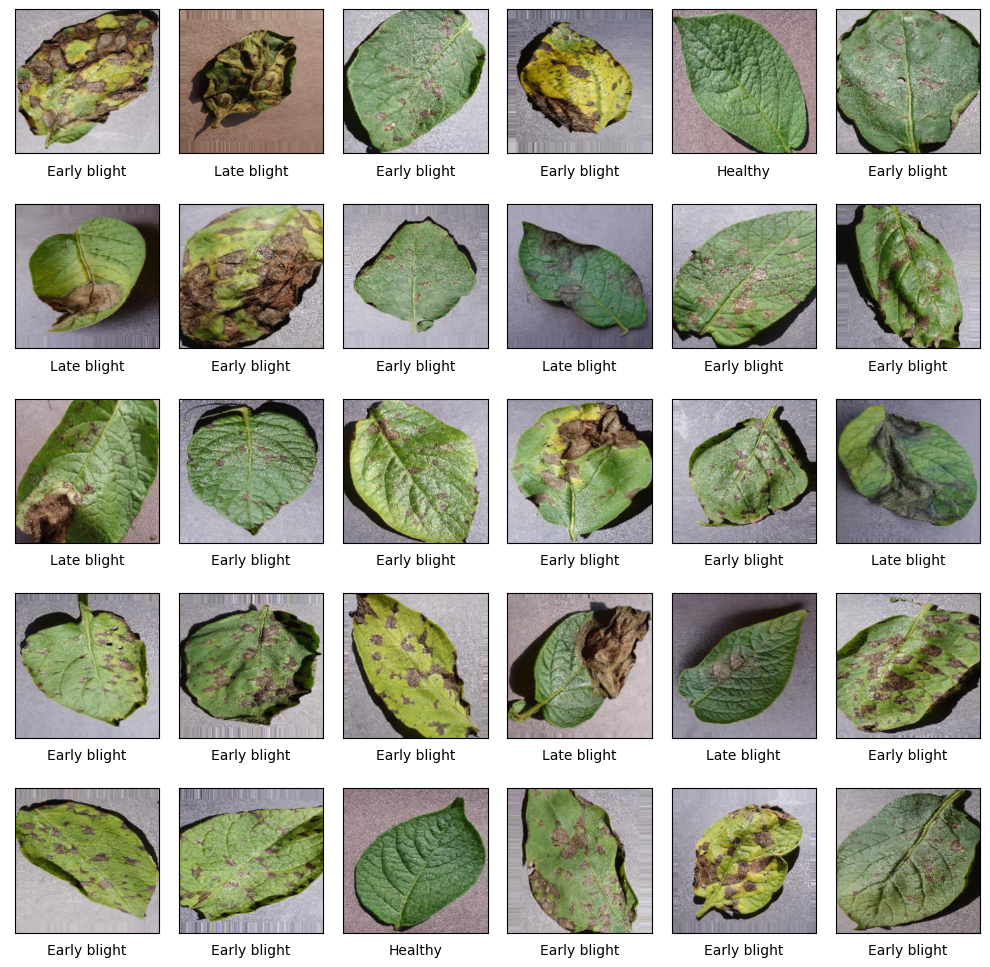

In [8]:
x, y = next(train_data_generator)
plot_images(x, y, 30, classes)

## Model Building
Define the Model Architecture

In [9]:
## Model Building
model = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = "same", input_shape = (250, 250, 3), activation = "relu"),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128, activation = "relu"),
    keras.layers.Dense(units = 64, activation = "relu"),
    keras.layers.Dense(units = 32, activation = "relu"),
    keras.layers.Dense(3, activation = "softmax")
])

model.summary()

C:\Users\Asus-PC\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 250, 250, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 125, 125, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 123, 123, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 59, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 27, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,859 (726.01 KB)

 Trainable params: 185,859 (726.01 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and training the model

In [16]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"])

history = model.fit(
    train_data_generator,
    validation_data = val_data_generator,
    batch_size = 32,
    verbose = 1,
    epochs = 50
)

Epoch 1/50


C:\Users\Asus-PC\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.4240 - loss: 0.9477 - val_accuracy: 0.4639 - val_loss: 0.9443
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.5266 - loss: 0.8921 - val_accuracy: 0.6134 - val_loss: 0.8209
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.6478 - loss: 0.7823 - val_accuracy: 0.7216 - val_loss: 0.6082
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7752 - loss: 0.5502 - val_accuracy: 0.8402 - val_loss: 0.3886
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8413 - loss: 0.4127 - val_accuracy: 0.8376 - val_loss: 0.3558
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8728 - loss: 0.3367 - val_accuracy: 0.9046 - val_loss: 0.2414
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9025 - loss: 0.2713 - val_accuracy: 0.8737 - val_loss: 0.2878
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8873 - loss: 0.2883 - val_accuracy: 0.9175 - val_loss: 0.1976
Epo

In [17]:
history.history

{'accuracy': [0.46963822841644287,
  0.5891472697257996,
  0.6950904130935669,
  0.7926356792449951,
  0.8397932648658752,
  0.8817829489707947,
  0.8856589198112488,
  0.905684769153595,
  0.905684769153595,
  0.9186046719551086,
  0.9354005455970764,
  0.9328165650367737,
  0.9515503644943237,
  0.9638242721557617,
  0.9567183256149292,
  0.9605942964553833,
  0.9664082527160645,
  0.9586563110351562,
  0.9593023061752319,
  0.9786821603775024,
  0.9618862867355347,
  0.9793281555175781,
  0.9625322818756104,
  0.9812661409378052,
  0.9832041263580322,
  0.9709302186965942,
  0.9748061895370483,
  0.9806201457977295,
  0.9793281555175781,
  0.9812661409378052,
  0.9864341020584106,
  0.9832041263580322,
  0.9844961166381836,
  0.9786821603775024,
  0.9819121360778809,
  0.9851421117782593,
  0.9890180826187134,
  0.985788106918335,
  0.9922480583190918,
  0.9786821603775024,
  0.9793281555175781,
  0.9870800971984863,
  0.9773901700973511,
  0.987726092338562,
  0.9909560680389404,
 

## Model Evaluation

In [46]:
test_loss, test_accuracy = model.evaluate(test_data_generator)
print("Test Accuracy:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 613ms/step - accuracy: 0.9639 - loss: 0.0866
Test Accuracy: 0.9583333134651184


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 583ms/step


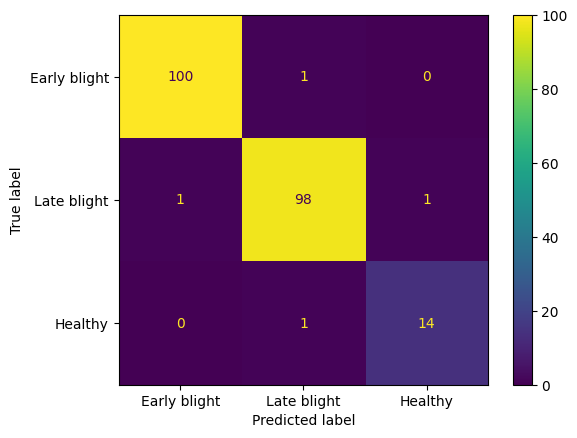

In [53]:
from sklearn.metrics import confusion_matrix

# Get predictions on the test set
y_pred = np.argmax(model.predict(test_data_generator), axis=-1)
y_true = test_data_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=classes))


              precision    recall  f1-score   support

Early blight       0.99      0.99      0.99       101
 Late blight       0.98      0.98      0.98       100
     Healthy       0.93      0.93      0.93        15

    accuracy                           0.98       216
   macro avg       0.97      0.97      0.97       216
weighted avg       0.98      0.98      0.98       216



## Training and Validation Curves

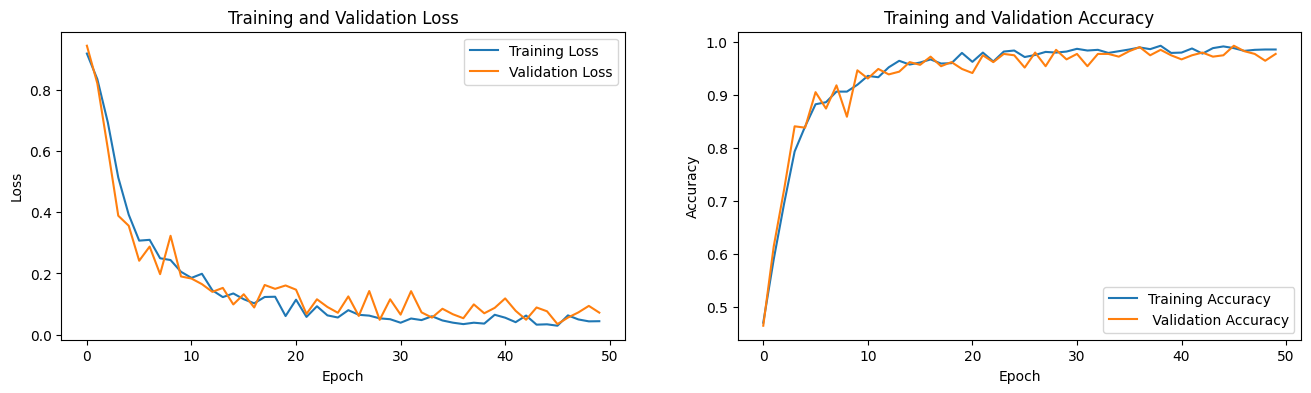

In [18]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = " Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

## Model Saving and Prediction


### Save the Model

In [34]:
base_dir = Path().cwd()
version_1_path = str(base_dir/"cnn_model_version_1.keras")
version_1_path

'E:\\Python - Intellipaat_D\\Practice\\You tube\\Deep Learning\\youtube_Code_Basics\\Project 1\\cnn_model_version_1.keras'

In [35]:
model.save(version_1_path)

### Load the Model

In [37]:
from tensorflow.keras.models import load_model

In [39]:
cnn_model = load_model("cnn_model_version_1.keras")

### Predict on Test Data

In [41]:
y_pred = cnn_model.predict(test_data_generator)
confidence = [round(100*(np.max(i)),2) for i in y_pred]
y_prediction = [np.argmax(i) for i in y_pred]

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 602ms/step


In [42]:
test_files, test_label = next(test_data_generator)

## Visualizing the actual image and predicted image

In [43]:
## Visulaizating the images
classes = ['Early blight', 'Late blight', 'Healthy']

def actual_vs_predicted_images_plot(actaul_x, actual_y, pred_y, indices, classes):
    plt.figure(figsize = (10,30))
    actual_y = actual_y.astype(int)
    for i, index in enumerate(range(indices)):
        plt.subplot(10,3, i+1)
        plt.imshow(actaul_x[index])
        plt.title(f"Actual: {classes[actual_y[index]]}, \n predicted: {classes[pred_y[index]]}, \n confidence: {confidence[index]}%", fontsize=10)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

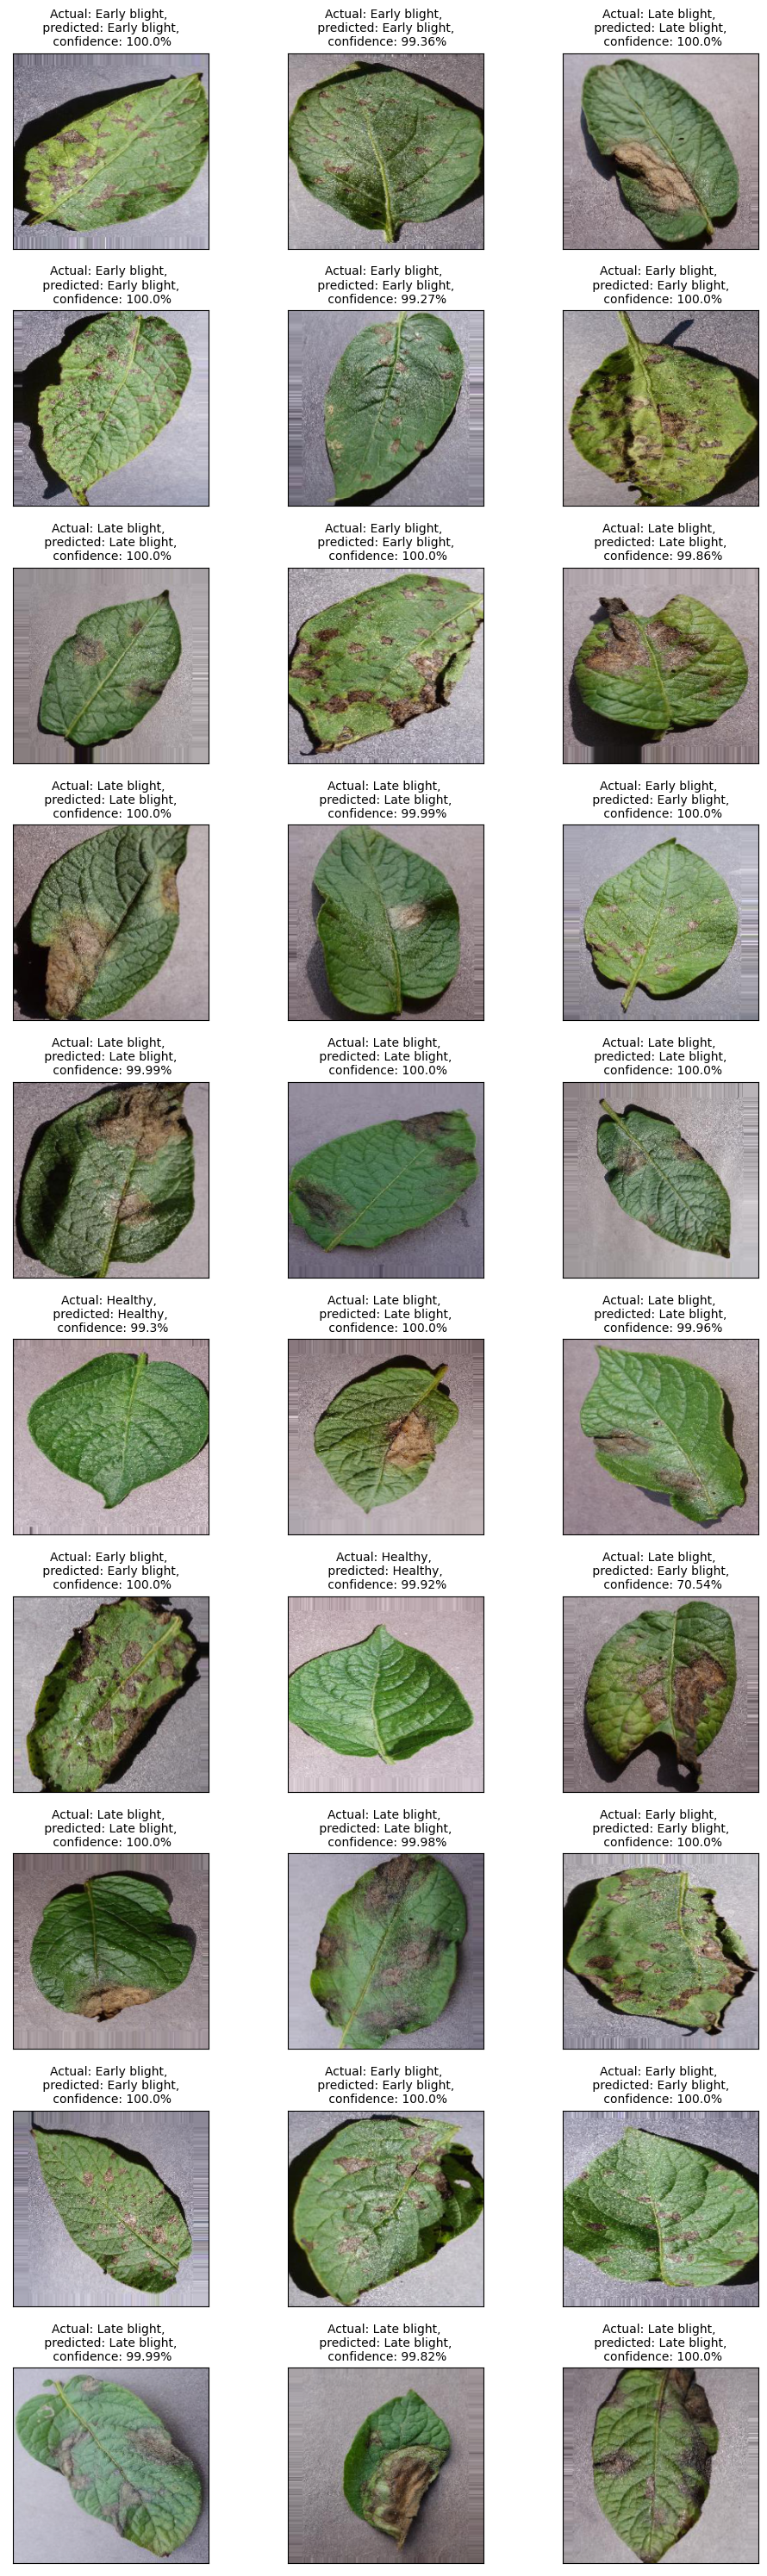

In [45]:
actual_vs_predicted_images_plot(test_files, test_label, y_prediction, 30, classes)